In [ ]:
import pandas as pd
import requests

# DATA

In [ ]:
clubs = pd.read_csv('epl_clubs_info_2022-23.csv')
clubs.head(20)

,club_name,abv,hex_code,logo_link
0,Arsenal,ARS,#EF0107,https://a.espncdn.com/i/teamlogos/soccer/500/3...
1,Aston Villa,AVL,#95BFE5,https://a.espncdn.com/i/teamlogos/soccer/500/3...
2,Bournemouth,BOU,#C91318,https://a.espncdn.com/i/teamlogos/soccer/500/3...
3,Brentford,BRE,#E30613,https://a.espncdn.com/i/teamlogos/soccer/500/3...
4,Brighton,BRI,#005DAA,https://a.espncdn.com/i/teamlogos/soccer/500/3...
5,Chelsea,CHE,#034694,https://a.espncdn.com/i/teamlogos/soccer/500/3...
6,Crystal Palace,CRY,#1B458F,https://a.espncdn.com/i/teamlogos/soccer/500/3...
7,Everton,EVE,#003399,https://a.espncdn.com/i/teamlogos/soccer/500/3...
8,Fulham,FUL,#000000,https://a.espncdn.com/i/teamlogos/soccer/500/3...
9,Leeds,LEE,#FFCD00,https://a.espncdn.com/i/teamlogos/soccer/500/3...


In [ ]:
results = pd.read_csv('epl_results_2022-23.csv')
results

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,2,2,16,11,3,5,1,2,0,0
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,3,4,7,9,4,4,2,0,0,0
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,3,2,18,16,5,5,3,3,0,0
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,4,6,13,9,6,4,2,0,0,0
4,E0,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,E0,08/04/2023,15:00,Tottenham,Brighton,2,1,H,1,1,...,3,4,15,15,3,7,3,1,0,0
292,E0,08/04/2023,15:00,Wolves,Chelsea,1,0,H,1,0,...,4,1,14,10,8,8,2,5,0,0
293,E0,08/04/2023,17:30,Southampton,Man City,1,4,A,0,1,...,1,8,6,10,0,10,0,2,0,0
294,E0,09/04/2023,14:00,Leeds,Crystal Palace,1,5,A,1,1,...,7,8,11,8,2,4,3,1,0,0


In [ ]:
pl_cleaned = results.drop(['Div','Date', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC','AC','HY','AY','HR','AR'], axis=1)
pl_cleaned

,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF
0,20:00,Crystal Palace,Arsenal,0,2,A,A Taylor,16,11
1,12:30,Fulham,Liverpool,2,2,D,A Madley,7,9
2,15:00,Bournemouth,Aston Villa,2,0,H,P Bankes,18,16
3,15:00,Leeds,Wolves,2,1,H,R Jones,13,9
4,15:00,Newcastle,Nottingham,2,0,H,S Hooper,9,14
...,...,...,...,...,...,...,...,...,...
291,15:00,Tottenham,Brighton,2,1,H,S Attwell,15,15
292,15:00,Wolves,Chelsea,1,0,H,P Bankes,14,10
293,17:30,Southampton,Man City,1,4,A,R Jones,6,10
294,14:00,Leeds,Crystal Palace,1,5,A,S Hooper,11,8


# WEBSCRAPPING

In [ ]:
pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats#all_stats_squads_defense")[0]

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,33,23,6,4,78,38,40,75,2.27,64.5,37.2,27.4,0.83,W D D D L,60203,Martinelli - 15,Aaron Ramsdale,NaN
1,2,Manchester City,31,23,4,4,82,29,53,73,2.35,66.0,25.0,41.0,1.32,W W W W W,53221,Erling Haaland - 33,Ederson,NaN
2,3,Newcastle Utd,32,17,11,4,58,26,32,62,1.94,56.6,32.4,24.2,0.76,W W L W W,52243,Callum Wilson - 13,Nick Pope,NaN
3,4,Manchester Utd,31,18,6,7,48,39,9,60,1.94,51.4,41.0,10.4,0.33,L W W W D,73704,Marcus Rashford - 16,David de Gea,NaN
4,5,Tottenham,33,16,6,11,60,53,7,54,1.64,48.7,43.3,5.4,0.16,D W L L D,61618,Harry Kane - 24,Hugo Lloris,NaN
5,6,Aston Villa,33,16,6,11,46,41,5,54,1.64,42.8,47.0,-4.2,-0.13,W W W D W,41650,Ollie Watkins - 14,Emiliano Martínez,NaN
6,7,Liverpool,32,15,8,9,61,39,22,53,1.66,59.4,44.2,15.2,0.48,D D W W W,53206,Mohamed Salah - 16,Alisson,NaN
7,8,Brighton,30,14,7,9,55,40,15,49,1.63,56.3,36.0,20.3,0.68,D W L W L,31460,Alexis Mac Allister - 8,Robert Sánchez,NaN
8,9,Brentford,33,11,14,8,50,43,7,47,1.42,49.0,43.4,5.6,0.17,L L L D W,17075,Ivan Toney - 19,David Raya,NaN
9,10,Fulham,32,13,6,13,44,43,1,45,1.41,38.7,51.9,-13.2,-0.41,L L W W L,23618,Aleksandar Mitrović - 11,Bernd Leno,NaN


In [ ]:
pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=spec&dom_lg=1&spec_comps=9&player_id1=1f44ac21&p1yrfrom=2022-2023&player_id2=21a66f6a&p2yrfrom=2022-2023&player_id3=e09f279b&p3yrfrom=2022-2023&player_id4=e342ad68&p4yrfrom=2022-2023&player_id5=48a5a5d6&p5yrfrom=2022-2023&player_id6=a1d5bd30&p6yrfrom=2022-2023&player_id7=aed3a70f&p7yrfrom=2022-2023")[0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Erling Haaland            2022-23             no NOR                 FW   
1         Harry Kane            2022-23            eng ENG                 FW   
2         Ivan Toney            2022-23            eng ENG                 FW   
3      Mohamed Salah            2022-23             eg EGY                 FW   
4         Martinelli            2022-23             br BRA                 FW   
5    Marcus Rashford            2022-23            eng ENG                 FW   

  Unnamed: 4_level_0 Playing Time                    Performance  ...  \
               Squad           MP Starts   Min   90s         Gls  ...   
0    Manchester City           29     28  2315  25.7          33  ...   
1          Tottenham           33     33  2955  32.8          24  ...   
2          Brentford           31     31  2771  30.8          19  ...   
3          Liverpool           32     31  2760  30.7          16  ...   
4            Arsenal           33     32  2659  29.5          15  ...   
5     Manchester Utd           30     28  2476  27.5          16  ...   

  Per 90 Minutes                                                             
             Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0           1.28  0.27  1.56  1.05   1.32  0.93  0.17   1.10  0.76     0.93  
1           0.73  0.09  0.82  0.61   0.70  0.57  0.18   0.75  0.45     0.63  
2           0.62  0.13  0.75  0.42   0.55  0.61  0.16   0.77  0.43     0.59  
3           0.52  0.23  0.75  0.52   0.75  0.53  0.19   0.72  0.48     0.67  
4           0.51  0.17  0.68  0.51   0.68  0.30  0.29   0.59  0.30     0.59  
5           0.58  0.18  0.76  0.58   0.76  0.45  0.10   0.56  0.45     0.56  

[6 rows x 34 columns]

In [ ]:
goals = pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=spec&dom_lg=1&spec_comps=9&player_id1=1f44ac21&p1yrfrom=2022-2023&player_id2=21a66f6a&p2yrfrom=2022-2023&player_id3=e09f279b&p3yrfrom=2022-2023&player_id4=e342ad68&p4yrfrom=2022-2023&player_id5=48a5a5d6&p5yrfrom=2022-2023&player_id6=a1d5bd30&p6yrfrom=2022-2023&player_id7=aed3a70f&p7yrfrom=2022-2023%22%22")[0].T
goals

0           1           2  \
Unnamed: 0_level_0 Player     Erling Haaland  Harry Kane  Ivan Toney   
Unnamed: 1_level_0 Span              2022-23     2022-23     2022-23   
Unnamed: 2_level_0 Nation             no NOR     eng ENG     eng ENG   
Unnamed: 3_level_0 Pos                    FW          FW          FW   
Unnamed: 4_level_0 Squad     Manchester City   Tottenham   Brentford   
Playing Time       MP                     29          33          31   
                   Starts                 28          33          31   
                   Min                  2315        2955        2771   
                   90s                  25.7        32.8        30.8   
Performance        Gls                    33          24          19   
                   Ast                     7           3           4   
                   G+A                    40          27          23   
                   G-PK                   27          20          13   
                   PK                      6           4           6   
                   PKatt                   6           5           7   
                   CrdY                    5           5           9   
                   CrdR                    0           0           0   
Expected           xG                   24.0        18.7        18.6   
                   npxG                 19.5        14.7        13.1   
                   xAG                   4.3         5.9         4.9   
                   npxG+xAG             23.8        20.6        18.1   
Progression        PrgC                   28          56          13   
                   PrgP                   49         158          73   
                   PrgR                  129         178         154   
Per 90 Minutes     Gls                  1.28        0.73        0.62   
                   Ast                  0.27        0.09        0.13   
                   G+A                  1.56        0.82        0.75   
                   G-PK                 1.05        0.61        0.42   
                   G+A-PK               1.32         0.7        0.55   
                   xG                   0.93        0.57        0.61   
                   xAG                  0.17        0.18        0.16   
                   xG+xAG                1.1        0.75        0.77   
                   npxG                 0.76        0.45        0.43   
                   npxG+xAG             0.93        0.63        0.59   

                                         3           4                5  
Unnamed: 0_level_0 Player    Mohamed Salah  Martinelli  Marcus Rashford  
Unnamed: 1_level_0 Span            2022-23     2022-23          2022-23  
Unnamed: 2_level_0 Nation           eg EGY      br BRA          eng ENG  
Unnamed: 3_level_0 Pos                  FW          FW               FW  
Unnamed: 4_level_0 Squad         Liverpool     Arsenal   Manchester Utd  
Playing Time       MP                   32          33               30  
                   Starts               31          32               28  
                   Min                2760        2659             2476  
                   90s                30.7        29.5             27.5  
Performance        Gls                  16          15               16  
                   Ast                   7           5                5  
                   G+A                  23          20               21  
                   G-PK                 16          15               16  
                   PK                    0           0                0  
                   PKatt                 2           0                0  
                   CrdY                  2           3                2  
                   CrdR                  0           0                0  
Expected           xG                 16.4         8.9             12.5  
                   npxG               14.8         8.9             12.5  
                   xAG                 5.7

In [ ]:
goals_cleaned = goals.drop(['Expected', 'Progression', 'Per 90 Minutes'])
goals_cleaned.T

<ipython-input-83-08208ff603fa>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  goals_cleaned = goals.drop(['Expected', 'Progression', 'Per 90 Minutes'])


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Erling Haaland            2022-23             no NOR                 FW   
1         Harry Kane            2022-23            eng ENG                 FW   
2         Ivan Toney            2022-23            eng ENG                 FW   
3      Mohamed Salah            2022-23             eg EGY                 FW   
4         Martinelli            2022-23             br BRA                 FW   
5    Marcus Rashford            2022-23            eng ENG                 FW   

  Unnamed: 4_level_0 Playing Time                    Performance               \
               Squad           MP Starts   Min   90s         Gls Ast G+A G-PK   
0    Manchester City           29     28  2315  25.7          33   7  40   27   
1          Tottenham           33     33  2955  32.8          24   3  27   20   
2          Brentford           31     31  2771  30.8          19   4  23   13   
3          Liverpool           32     31  2760  30.7          16   7  23   16   
4            Arsenal           33     32  2659  29.5          15   5  20   15   
5     Manchester Utd           30     28  2476  27.5          16   5  21   16   

                      
  PK PKatt CrdY CrdR  
0  6     6    5    0  
1  4     5    5    0  
2  6     7    9    0  
3  0     2    2    0  
4  0     0    3    0  
5  0     0    2    0

In [ ]:
referee_df = pd.read_html("https://www.soccerbase.com/referees/home.sd?tourn_id=1944")[0]
referee_df = referee_df.rename(columns={"NAME": "Referee"})

# ANALYSIS





#### Correlation between home and away fouls: are teams more likely to play aggressively at home or away.

In [ ]:
pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)

,HF
HomeTeam,
Leeds,191
Tottenham,185
Nottingham,185
Crystal Palace,183
Bournemouth,169
Southampton,164
Leicester,163
Wolves,163
Man United,159


In [ ]:
pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=False).

,AF
AwayTeam,
Wolves,190
Aston Villa,189
Southampton,187
Crystal Palace,175
Man United,167
Leeds,166
Chelsea,165
Nottingham,164
Fulham,164


In [ ]:
home_HF = pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)
away_AF = pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=False)

merged_fouls_HA = home_HF.merge(away_AF, left_index=True, right_index=True, suffixes=('_home', '_away')).reset_index()
merged_fouls_HA

,index,HF,AF
0,Leeds,191,166
1,Tottenham,185,158
2,Nottingham,185,164
3,Crystal Palace,183,175
4,Bournemouth,169,144
5,Southampton,164,187
6,Leicester,163,159
7,Wolves,163,190
8,Man United,159,167
9,Chelsea,158,165


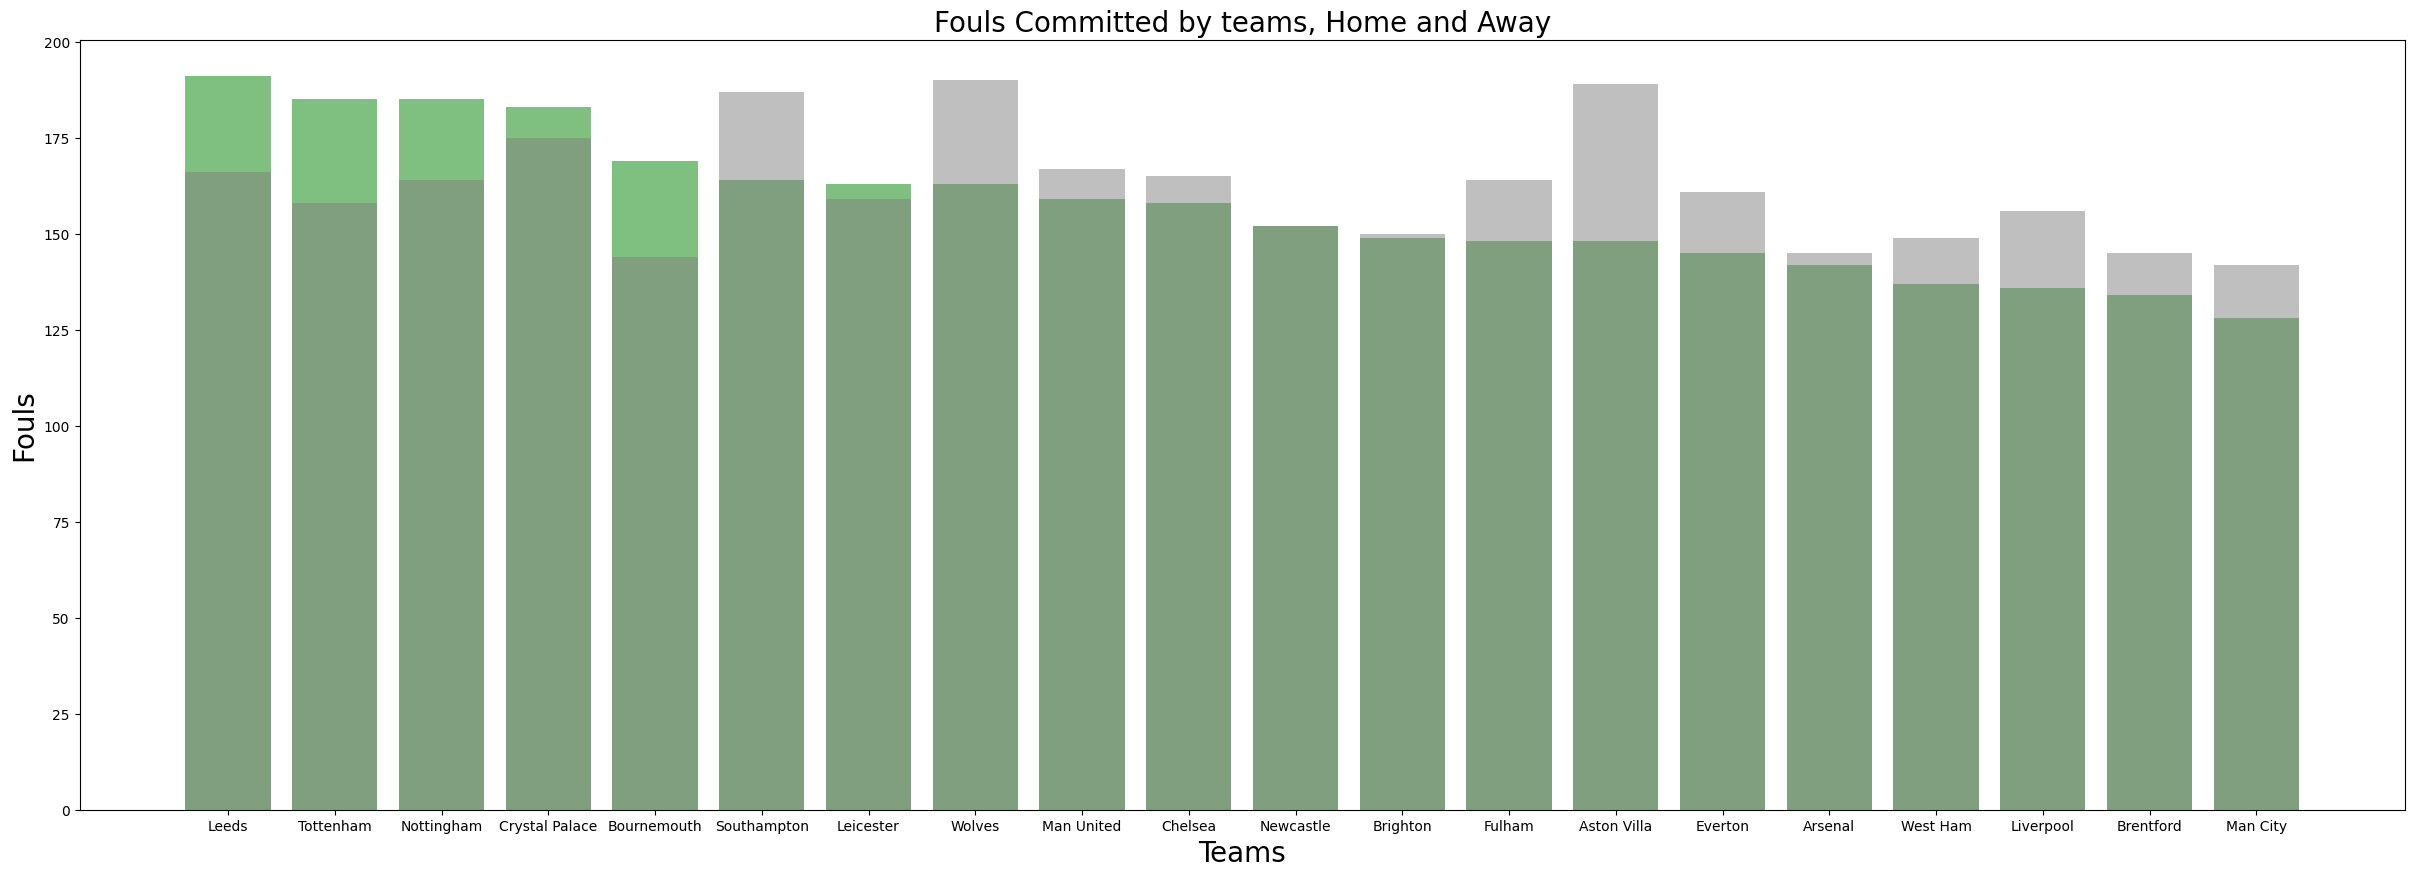

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(merged_fouls_HA["index"], merged_fouls_HA["HF"], color="green", alpha=0.5)
plt.bar(merged_fouls_HA["index"], merged_fouls_HA["AF"], color="grey", alpha=0.5)
plt.title("Fouls Committed by teams, Home and Away", fontsize = 20)
plt.xlabel("Teams", fontsize = 20)
plt.ylabel("Fouls", fontsize = 20)


plt.show()

In [ ]:
home_HF = pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)
away_AF = pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=False)

merged_AH = away_AF.merge(home_HF, left_index=True, right_index=True, suffixes=('_home', '_away')).reset_index()
merged_AH

,index,AF,HF
0,Wolves,190,163
1,Aston Villa,189,148
2,Southampton,187,164
3,Crystal Palace,175,183
4,Man United,167,159
5,Leeds,166,191
6,Chelsea,165,158
7,Nottingham,164,185
8,Fulham,164,148
9,Everton,161,145


In [ ]:
home_HF = pl_cleaned.groupby(['HomeTeam']).agg({'HF':'sum'}).sort_values('HF', ascending=False)
away_AF = pl_cleaned.groupby(['AwayTeam']).agg({'AF':'sum'}).sort_values('AF', ascending=True)

merged_Total_Fouls = home_HF.merge(away_AF, left_index=True, right_index=True, suffixes=('_home', '_away'))
merged_Total_Fouls = merged_AH.assign(Total_Fouls = merged_AH['HF'] + merged_AH['AF'])
merged_Total_Fouls

,AF,HF,Total_Fouls
Wolves,190,163,353
Aston Villa,189,148,337
Southampton,187,164,351
Crystal Palace,175,183,358
Man United,167,159,326
Leeds,166,191,357
Chelsea,165,158,323
Nottingham,164,185,349
Fulham,164,148,312
Everton,161,145,306


#### Number of fouls per referee and the ratio with the number of games they have refereed. 
#### Their level of strictness 

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(refs['Referee'], refs['Total Fouls'])
plt.xticks(fontsize=15, rotation=45)
plt.ylabel('Total Number of Fouls', fontsize = 20)
plt.yticks(fontsize=15)
plt.xlabel('Referee', fontsize = 20)
plt.title('Total Fouls per Referee')
plt.show()

In [ ]:
refs = pl_cleaned.groupby(['Referee']).agg({'HF':'sum', 'AF':'sum'})
refs['Total Fouls'] = refs['HF'] + refs['AF']

refs = refs.sort_values('Total Fouls', ascending=False).reset_index()
refs

,Referee,HF,AF,Total Fouls
0,P Tierney,262,255,517
1,M Oliver,259,227,486
2,A Taylor,213,239,452
3,S Hooper,215,224,439
4,R Jones,207,232,439
5,C Pawson,211,219,430
6,A Madley,209,219,428
7,S Attwell,209,206,415
8,P Bankes,195,191,386
9,D Coote,171,198,369


In [ ]:
refs_cleaned = referee_df.drop(['YELLOW CARDS', 'RED CARDS'], axis=1)
refs_cleaned

,Referee,FROM,GAMES 2022/23
0,Stuart Attwell,Warwickshire,21
1,Peter Bankes,Lancashire,17
2,Darren Bond,Lancashire,4
3,Thomas Bramall,England,6
4,John Brooks,England,14
5,David Coote,Nottinghamshire,18
6,Darren England,Doncaster,16
7,Jarred Gillett,Australia,14
8,Tony Harrington,Cleveland,6
9,Simon Hooper,Wiltshire,24


In [ ]:
print(referee_df.columns)

Index(['Referee', 'FROM', 'GAMES 2022/23', 'YELLOW CARDS', 'RED CARDS'], dtype='object')


In [ ]:
first = refs_cleaned['Referee'].str[0].str.upper()
last = refs_cleaned['Referee'].str.split().str[-1]
refs_cleaned["F Name"] = first+ " " + last
refs_cleaned

,Referee,FROM,GAMES 2022/23,F Name
0,Stuart Attwell,Warwickshire,21,S Attwell
1,Peter Bankes,Lancashire,17,P Bankes
2,Darren Bond,Lancashire,4,D Bond
3,Thomas Bramall,England,6,T Bramall
4,John Brooks,England,14,J Brooks
5,David Coote,Nottinghamshire,18,D Coote
6,Darren England,Doncaster,16,D England
7,Jarred Gillett,Australia,14,J Gillett
8,Tony Harrington,Cleveland,6,T Harrington
9,Simon Hooper,Wiltshire,24,S Hooper


In [ ]:
refs_strict['Number of Fouls/Apps'] = refs_strict['Total Fouls']/refs_strict['GAMES 2022/23']
refs_stricter = refs_strict.drop(['Referee_y', 'FROM', 'F Name'], axis=1)

refs_stricter = refs_stricter.rename(columns={"Referee_x": "Referee"})
refs_stricter = refs_stricter.rename(columns={"GAMES 2022/23": "Games"})
refs_stricter = refs_stricter.rename(columns={"Number of Fouls/Apps": "Fouls / Games"})

refs_stricter = refs_stricter.sort_values('Fouls / Games', ascending=False)

def strict(x):
    if x >= 20:
        return 'Very Strict'
    elif x >= 18.5:
        return 'Bearable'
    elif x >= 16:
        return 'Easy Going'
    else:
        return None

refs_stricter['Strictness'] = refs_stricter['Fouls / Games'].apply(strict)

refs_stricter

,Referee,HF,AF,Total Fouls,Games,Fouls / Games,Strictness
20,T Robinson,23,34,57,2,28.500000,Very Strict
21,R Madley,10,17,27,1,27.000000,Very Strict
8,P Bankes,195,191,386,17,22.705882,Very Strict
5,C Pawson,211,219,430,19,22.631579,Very Strict
10,M Salisbury,168,145,313,14,22.357143,Very Strict
16,T Harrington,63,69,132,6,22.000000,Very Strict
9,D Coote,171,198,369,18,20.500000,Very Strict
17,T Bramall,60,60,120,6,20.000000,Very Strict
4,R Jones,207,232,439,22,19.954545,Bearable
18,G Scott,58,61,119,6,19.833333,Bearable


In [ ]:
refs

,Referee,HF,AF,Total Fouls
0,P Tierney,262,255,517
1,M Oliver,259,227,486
2,A Taylor,213,239,452
3,S Hooper,215,224,439
4,R Jones,207,232,439
5,C Pawson,211,219,430
6,A Madley,209,219,428
7,S Attwell,209,206,415
8,P Bankes,195,191,386
9,D Coote,171,198,369


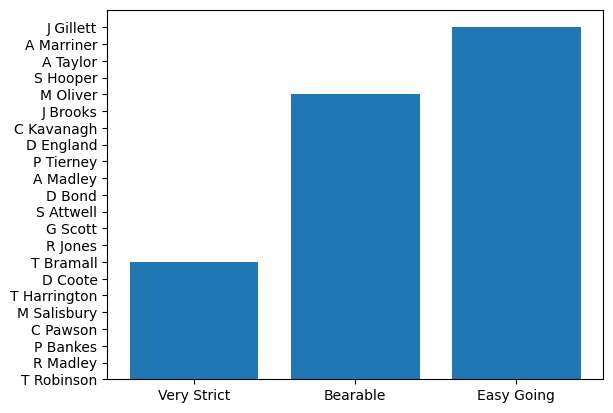

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(refs_stricter['Strictness'], refs_stricter['Referee'])
plt.show()

In [ ]:
refs_stricter.to_csv('refs_stricter.csv', index=True)

In [ ]:
import matplotlib.pyplot as plt
from math import pi

refs_stricter = pd.read_csv('refs_stricter.csv')

def radar_chart(ref_name, df):
    
    categories = list(df.columns[1:-1])
    values = df.values.tolist()[0][1:-1]
    values += values[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([5, 10, 15, 20, 25, 30], ["5", "10", "15", "20", "25", "30"], color="grey", size=7)
    plt.ylim(0, 30)
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.title(ref_name + ' Referee Strictness', size=11, color='black', y=1.1)
    plt.show()

for i in range(len(refs_stricter)):
    ref_name = refs_stricter.iloc[i, 0]
    ref_data = refs_stricter.iloc[i:i+1, :]
    radar_chart(ref_name, ref_data)